In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore' )

In [48]:
data = pd.read_csv("loan_data.csv")

In [49]:
data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0.60,80,400,0,120,0,M,D,D,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1.61,70,0,0,70,0,F,D,D,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0.95,70,0,0,70,0,M,D,D,1
43384,35,0,0,0,0,1,0,4000,0,0,...,0.51,80,400,0,190,0,F,D,D,1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43386 entries, 0 to 43385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            43386 non-null  int64  
 1   TOT_LOAN       43386 non-null  int64  
 2   TOT_LOAN_CRD   43386 non-null  int64  
 3   LOAN_BNK       43386 non-null  int64  
 4   LOAN_CPT       43386 non-null  int64  
 5   CRDT_CNT       43386 non-null  int64  
 6   GUARN_CNT      43386 non-null  int64  
 7   INCOME         43386 non-null  int64  
 8   LOAN_CRD_CNT   43386 non-null  int64  
 9   LATE_RATE      43386 non-null  int64  
 10  LATE_RATE_1Y   43386 non-null  int64  
 11  INS_MON_MAX    43386 non-null  float64
 12  CANCEL_CNT_1Y  43386 non-null  int64  
 13  CALL_TIME      43386 non-null  float64
 14  TEL_COST_MON   43386 non-null  int64  
 15  MOBILE_PRICE   43386 non-null  int64  
 16  SUSP_DAY       43386 non-null  int64  
 17  LATE_TEL       43386 non-null  int64  
 18  COMB_C

In [51]:
data.nunique()

AGE                11
TOT_LOAN          218
TOT_LOAN_CRD      209
LOAN_BNK          203
LOAN_CPT           69
CRDT_CNT           12
GUARN_CNT          11
INCOME             53
LOAN_CRD_CNT       11
LATE_RATE          93
LATE_RATE_1Y        9
INS_MON_MAX        37
CANCEL_CNT_1Y       7
CALL_TIME        1229
TEL_COST_MON       43
MOBILE_PRICE       13
SUSP_DAY          415
LATE_TEL           66
COMB_COMM           2
SEX                 2
PAY_METHOD          4
JOB                 4
TARGET              2
dtype: int64

In [52]:
num_cols = ['AGE','TOT_LOAN','TOT_LOAN_CRD','LOAN_BNK','LOAN_CPT','CRDT_CNT','GUARN_CNT','INCOME','LOAN_CRD_CNT','LATE_RATE','LATE_RATE_1Y',
           'INS_MON_MAX','CANCEL_CNT_1Y','CALL_TIME','TEL_COST_MON','MOBILE_PRICE','SUSP_DAY','LATE_TEL']
cat_cols = ['SEX','PAY_METHOD','JOB','COMB_COMM']

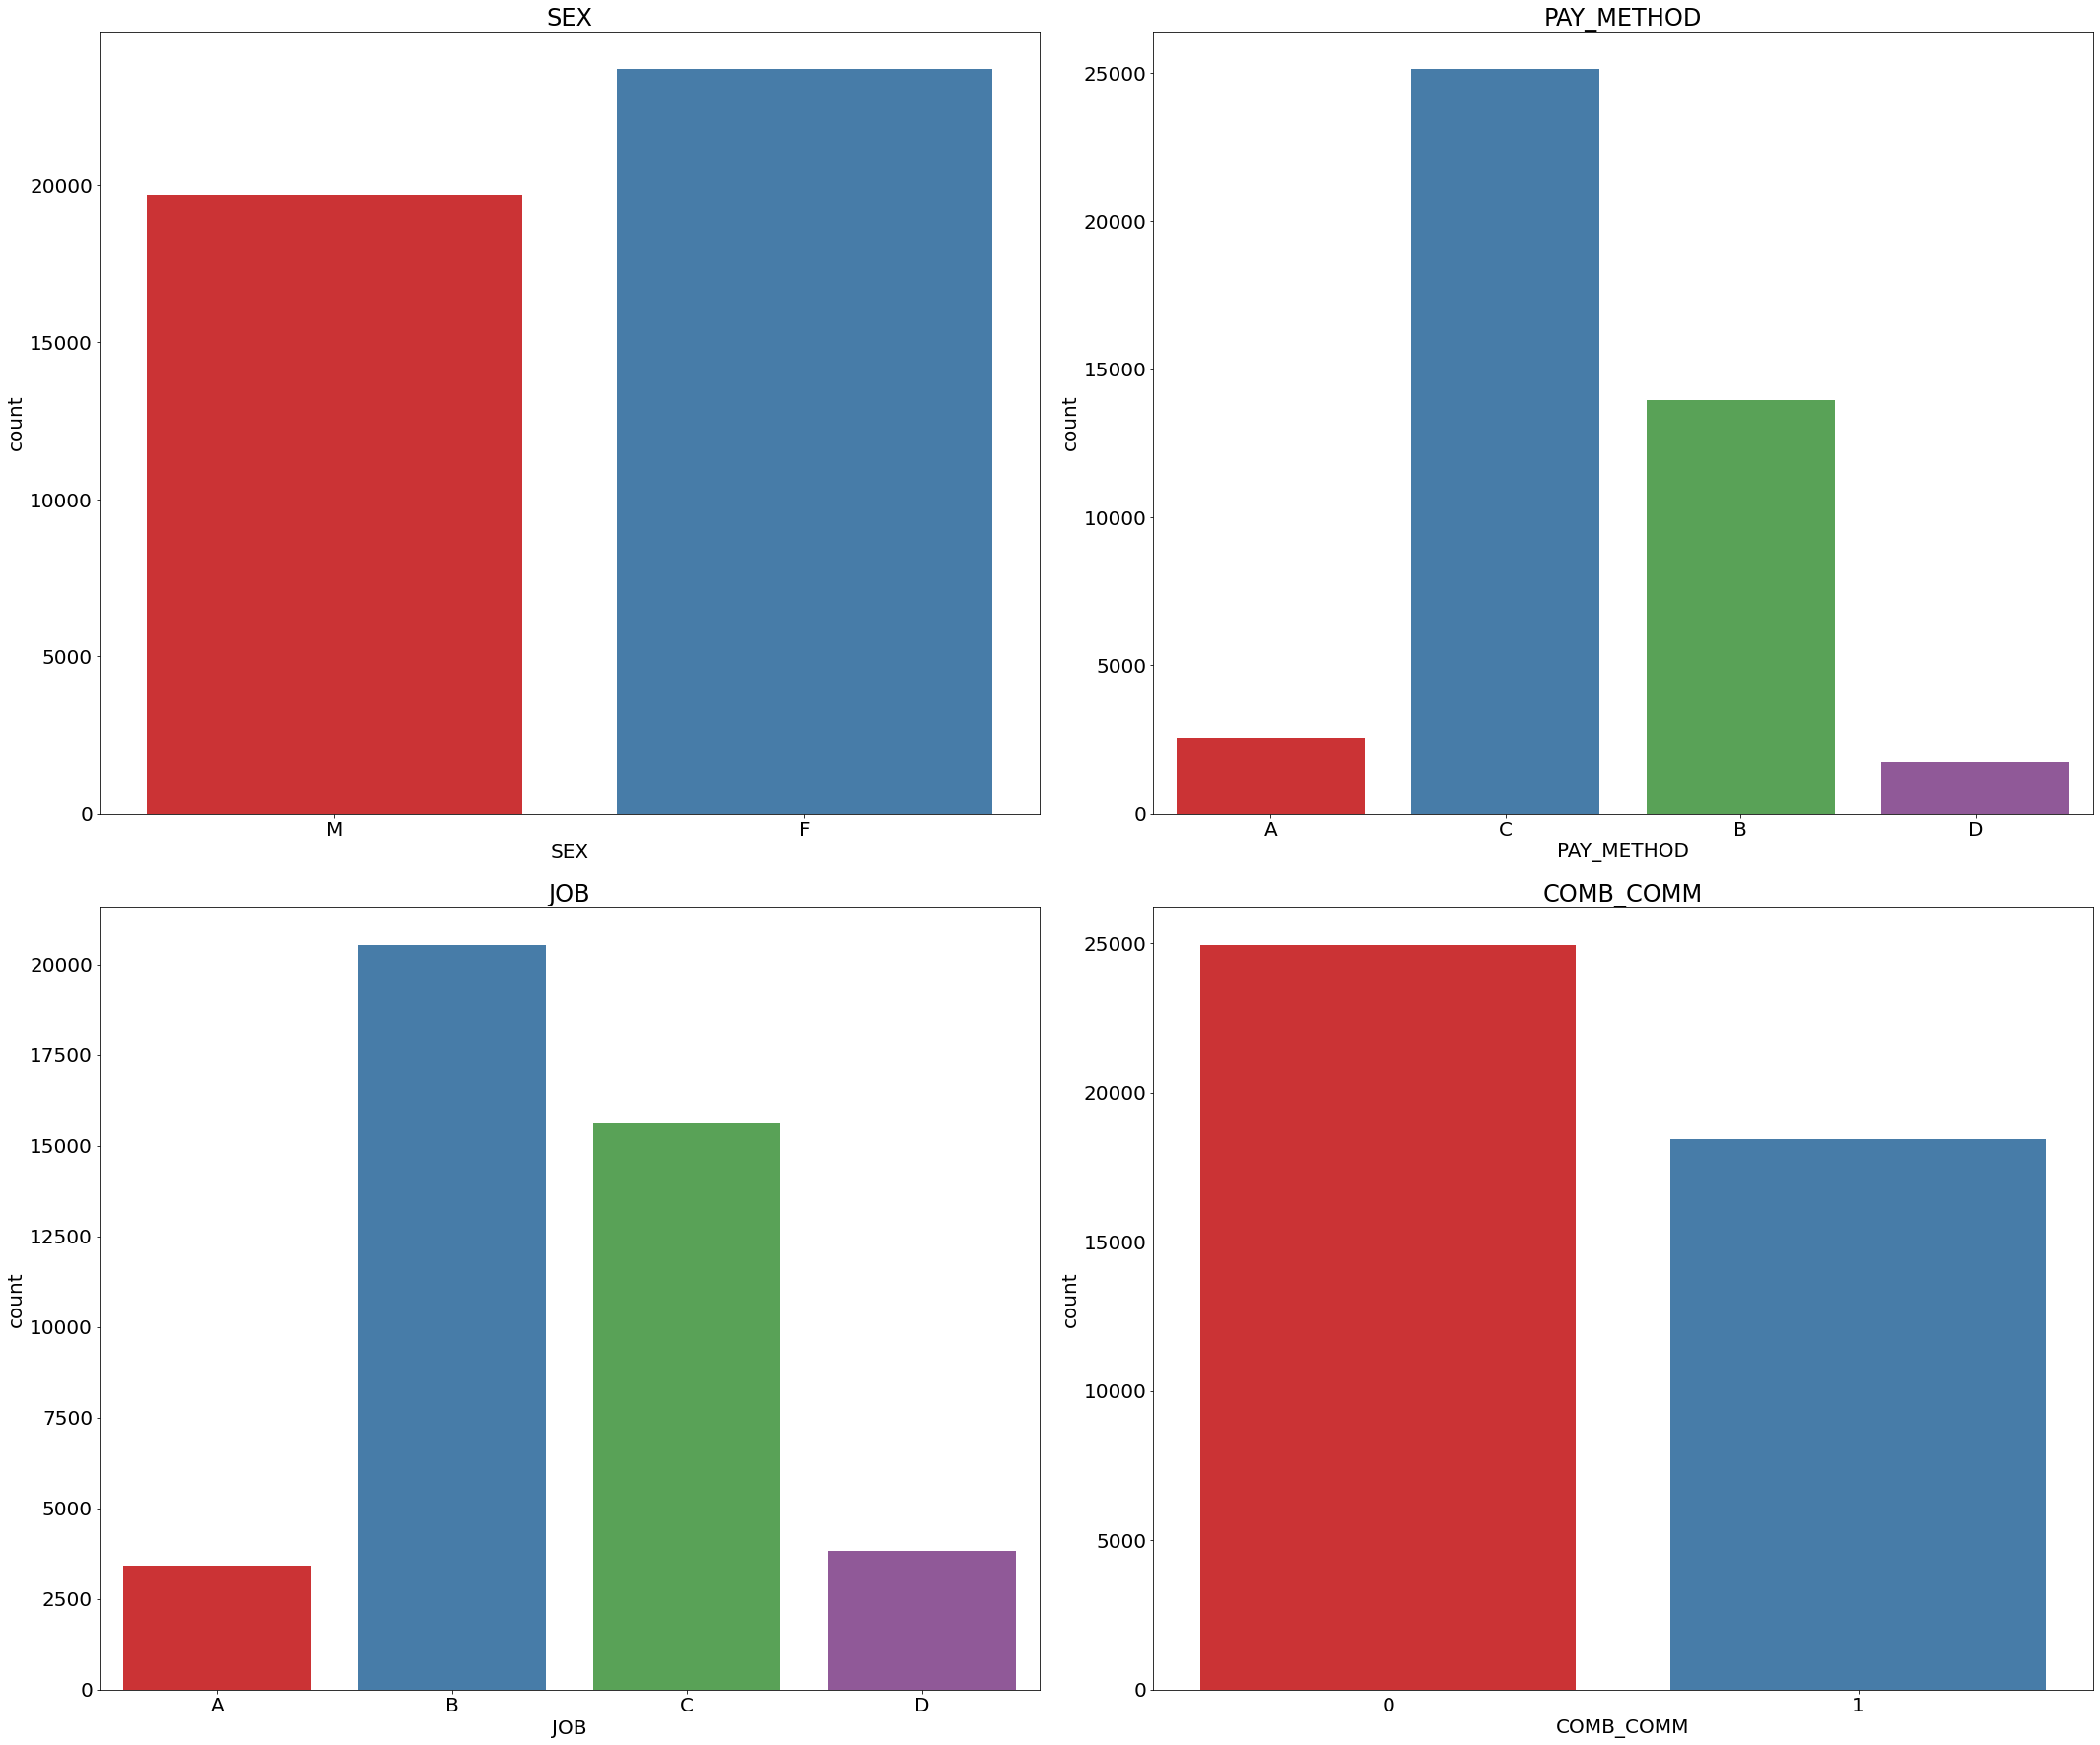

In [53]:
fig = plt.figure(figsize=(30,25))
plt.rc('font', size=20)

for i in range(len(cat_cols)):
    ax = fig.add_subplot(2,2,i+1)
    ax = sns.countplot(data[cat_cols[i]],palette='Set1')
    plt.title(cat_cols[i])
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='TARGET', ylabel='count'>

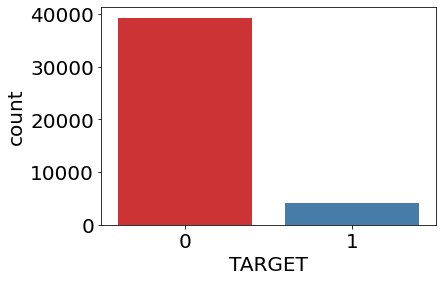

In [54]:
# fig = plt.figure(figsize=(30,25))
# plt.rc('font', size=20)
# fig.suptitle('범주형 독립변수 분포')

# for i in range(len(cat_cols)):
#     ax = fig.add_subplot(2,2,i+1)
#     ax = sns.countplot(data[cat_cols[i]],palette='Set1')
#     plt.title(cat_cols[i])
# fig.tight_layout()
# plt.show()

sns.countplot(data['TARGET'],palette='Set1')

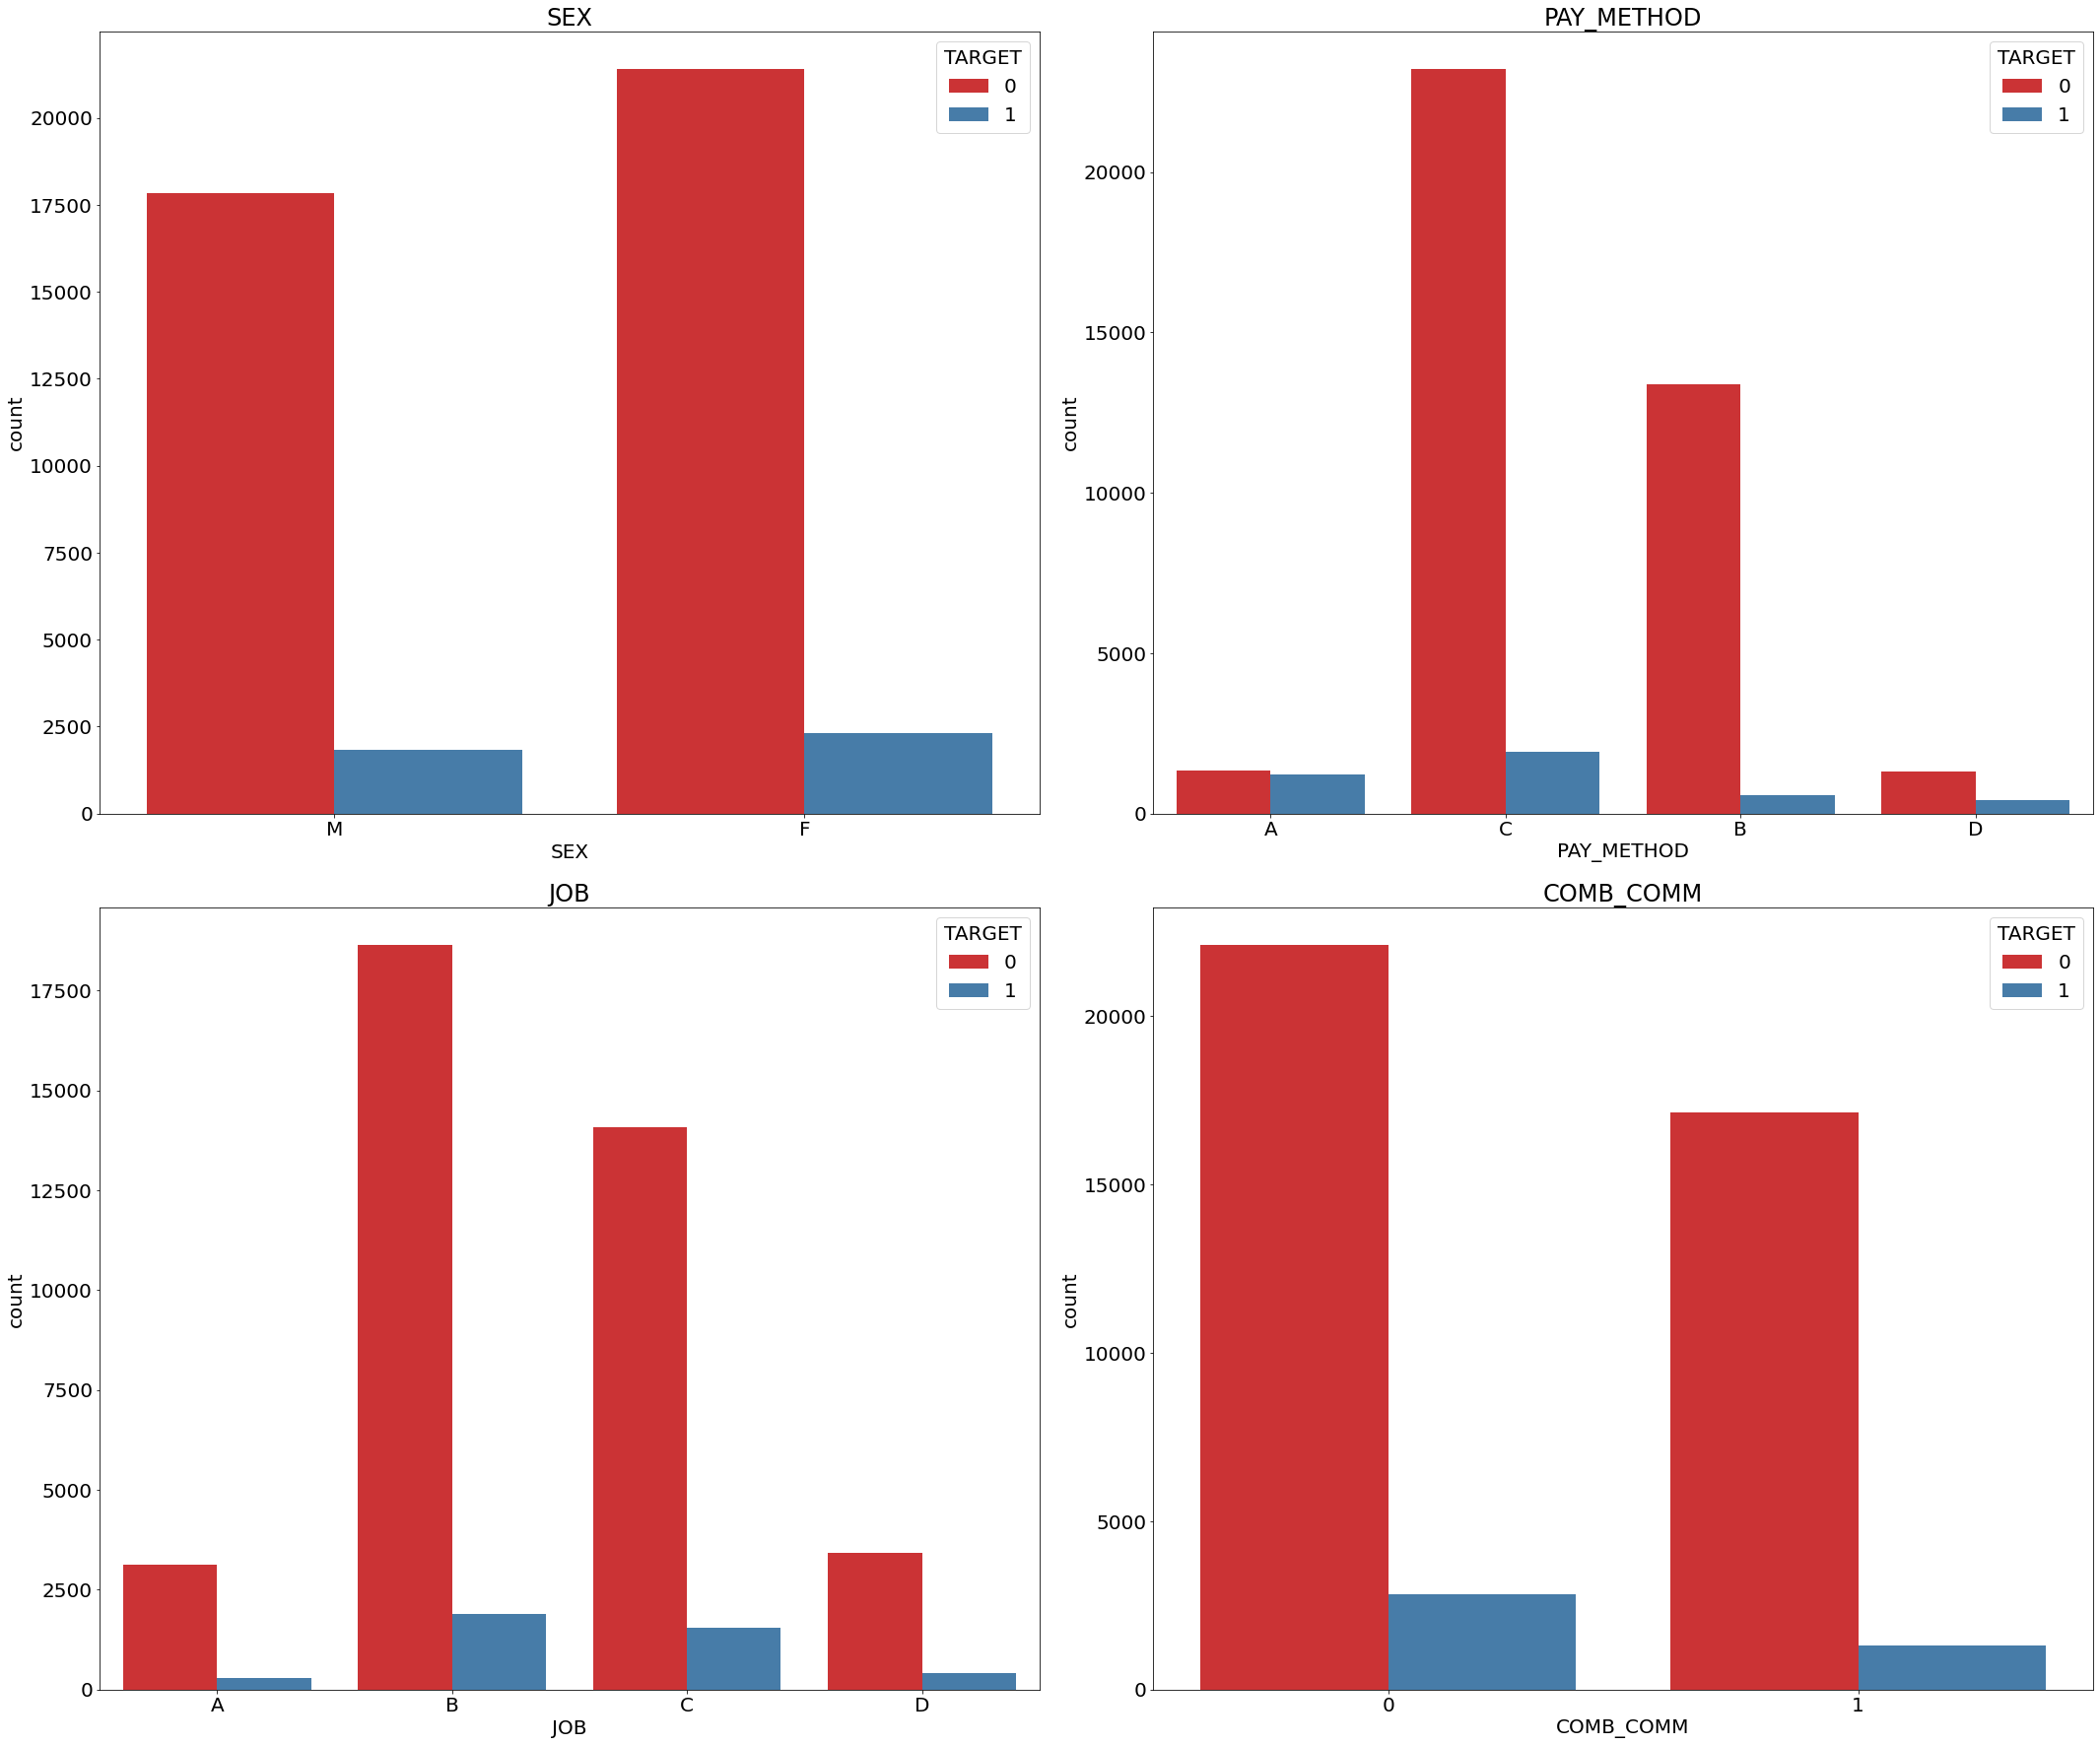

In [55]:
fig = plt.figure(figsize=(30,25))
# plt.rc('font', size=20)

for i in range(len(cat_cols)):
    ax = fig.add_subplot(2,2,i+1)
    ax = sns.countplot(data =data, x=data[cat_cols[i]], hue='TARGET',palette='Set1')
    plt.title(cat_cols[i])
fig.tight_layout()
plt.show()

In [56]:
data[num_cols].describe()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL
count,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000
mean,46.250980,82.019407,32.829622,49.324897,4.288641,3.004264,0.098695,2778.629051,0.163855,8.216406,6.389619,373.254506,0.024662,2.098970,75.477804,534.423547,18.433320,13.757664
std,9.693741,126.702976,83.419760,92.443944,12.660968,1.842478,0.529664,2470.097227,0.617522,12.120840,14.556618,690.067030,0.206476,15.364253,62.311464,382.237230,133.523351,53.272289
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.430000,40.000000,0.000000,0.000000,0.000000
50%,45.000000,36.000000,9.000000,9.000000,0.000000,3.000000,0.000000,3600.000000,0.000000,3.000000,0.000000,190.000000,0.000000,0.990000,60.000000,700.000000,0.000000,0.000000
75%,55.000000,102.000000,27.000000,60.000000,3.000000,4.000000,0.000000,4700.000000,0.000000,11.000000,10.000000,390.000000,0.000000,1.887500,80.000000,900.000000,0.000000,0.000000
max,70.000000,994.000000,994.000000,944.000000,301.000000,11.000000,10.000000,10000.000000,11.000000,100.000000,100.000000,10000.000000,6.000000,1520.000000,950.000000,1200.000000,2700.000000,1200.000000


In [57]:
data[num_cols].corr()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL
AGE,1.000000,0.100693,0.049429,0.057704,-0.023392,0.049496,0.058666,-0.081809,0.075785,0.013287,-0.064284,0.026295,-0.032861,-0.019069,-0.237655,-0.109713,-0.036550,-0.120485
TOT_LOAN,0.100693,1.000000,0.632357,0.701314,0.116705,0.170974,0.134531,0.012968,-0.004628,-0.007837,-0.029522,-0.001429,-0.013515,-0.003979,-0.025535,0.007084,-0.005584,-0.073642
TOT_LOAN_CRD,0.049429,0.632357,1.000000,0.270881,0.146111,0.085600,0.116401,0.002396,-0.009705,-0.005303,-0.010542,0.001316,-0.005225,0.001596,-0.002275,-0.004659,0.003761,-0.032863
LOAN_BNK,0.057704,0.701314,0.270881,1.000000,-0.009503,0.193755,0.074777,0.017675,-0.011940,-0.014524,-0.026955,-0.010057,-0.010740,-0.003940,-0.029786,0.025103,-0.000574,-0.086872
LOAN_CPT,-0.023392,0.116705,0.146111,-0.009503,1.000000,0.114739,0.054870,0.004443,0.005227,-0.000476,0.000123,-0.003147,0.002629,-0.002090,0.046424,0.024000,0.017395,0.025093
CRDT_CNT,0.049496,0.170974,0.085600,0.193755,0.114739,1.000000,0.043878,0.030422,0.014215,-0.012764,-0.045928,-0.010673,-0.022755,-0.018273,-0.043181,0.035898,-0.010408,-0.117635
GUARN_CNT,0.058666,0.134531,0.116401,0.074777,0.054870,0.043878,1.000000,-0.003874,0.001083,-0.003697,-0.000719,0.000044,0.003245,-0.007010,0.021785,0.003654,0.004719,-0.001234
INCOME,-0.081809,0.012968,0.002396,0.017675,0.004443,0.030422,-0.003874,1.000000,-0.019576,-0.031606,-0.013500,0.101702,0.011573,0.009676,0.014201,0.022284,-0.002880,-0.003106
LOAN_CRD_CNT,0.075785,-0.004628,-0.009705,-0.011940,0.005227,0.014215,0.001083,-0.019576,1.000000,0.090242,0.049966,0.093993,0.015307,0.002786,-0.018169,0.000028,0.007401,-0.000121
LATE_RATE,0.013287,-0.007837,-0.005303,-0.014524,-0.000476,-0.012764,-0.003697,-0.031606,0.090242,1.000000,0.501203,0.058652,0.107632,-0.007324,0.000998,-0.014796,-0.000435,0.019700


<AxesSubplot:>

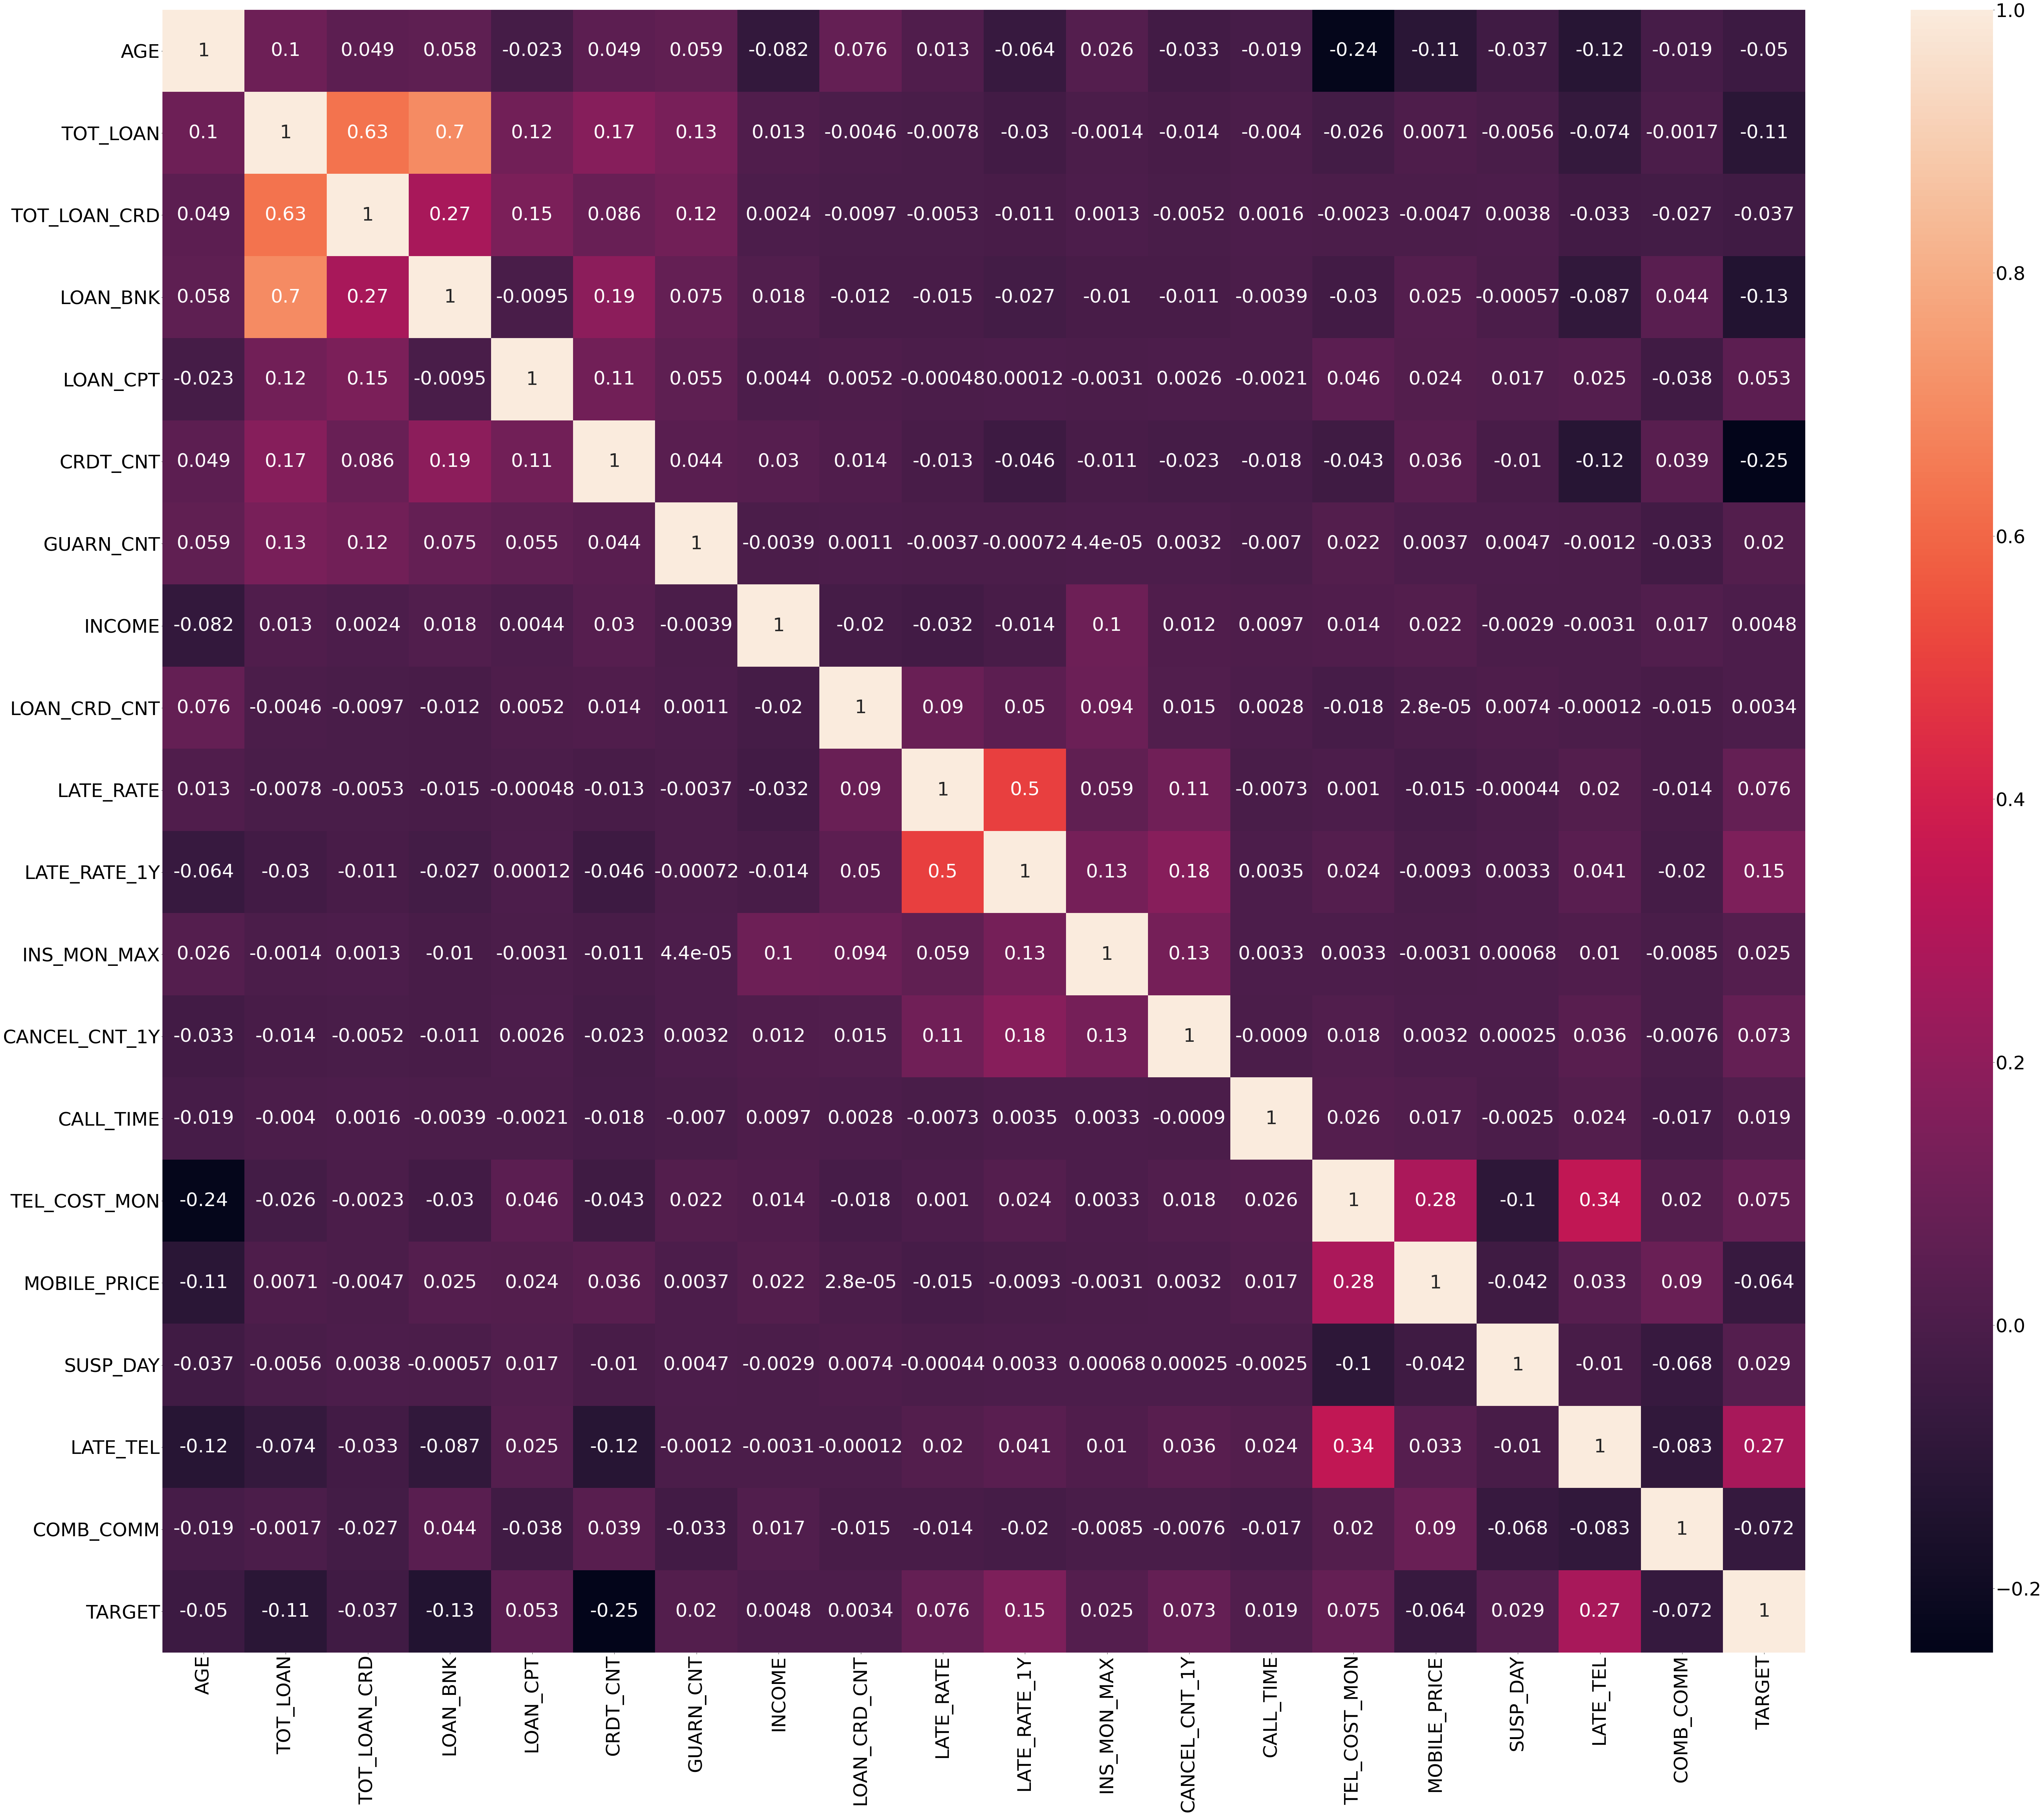

In [58]:
plt.figure(figsize=(100,80))
plt.rc('font', size=50)
sns.heatmap(data.corr(),annot=True,square = True)

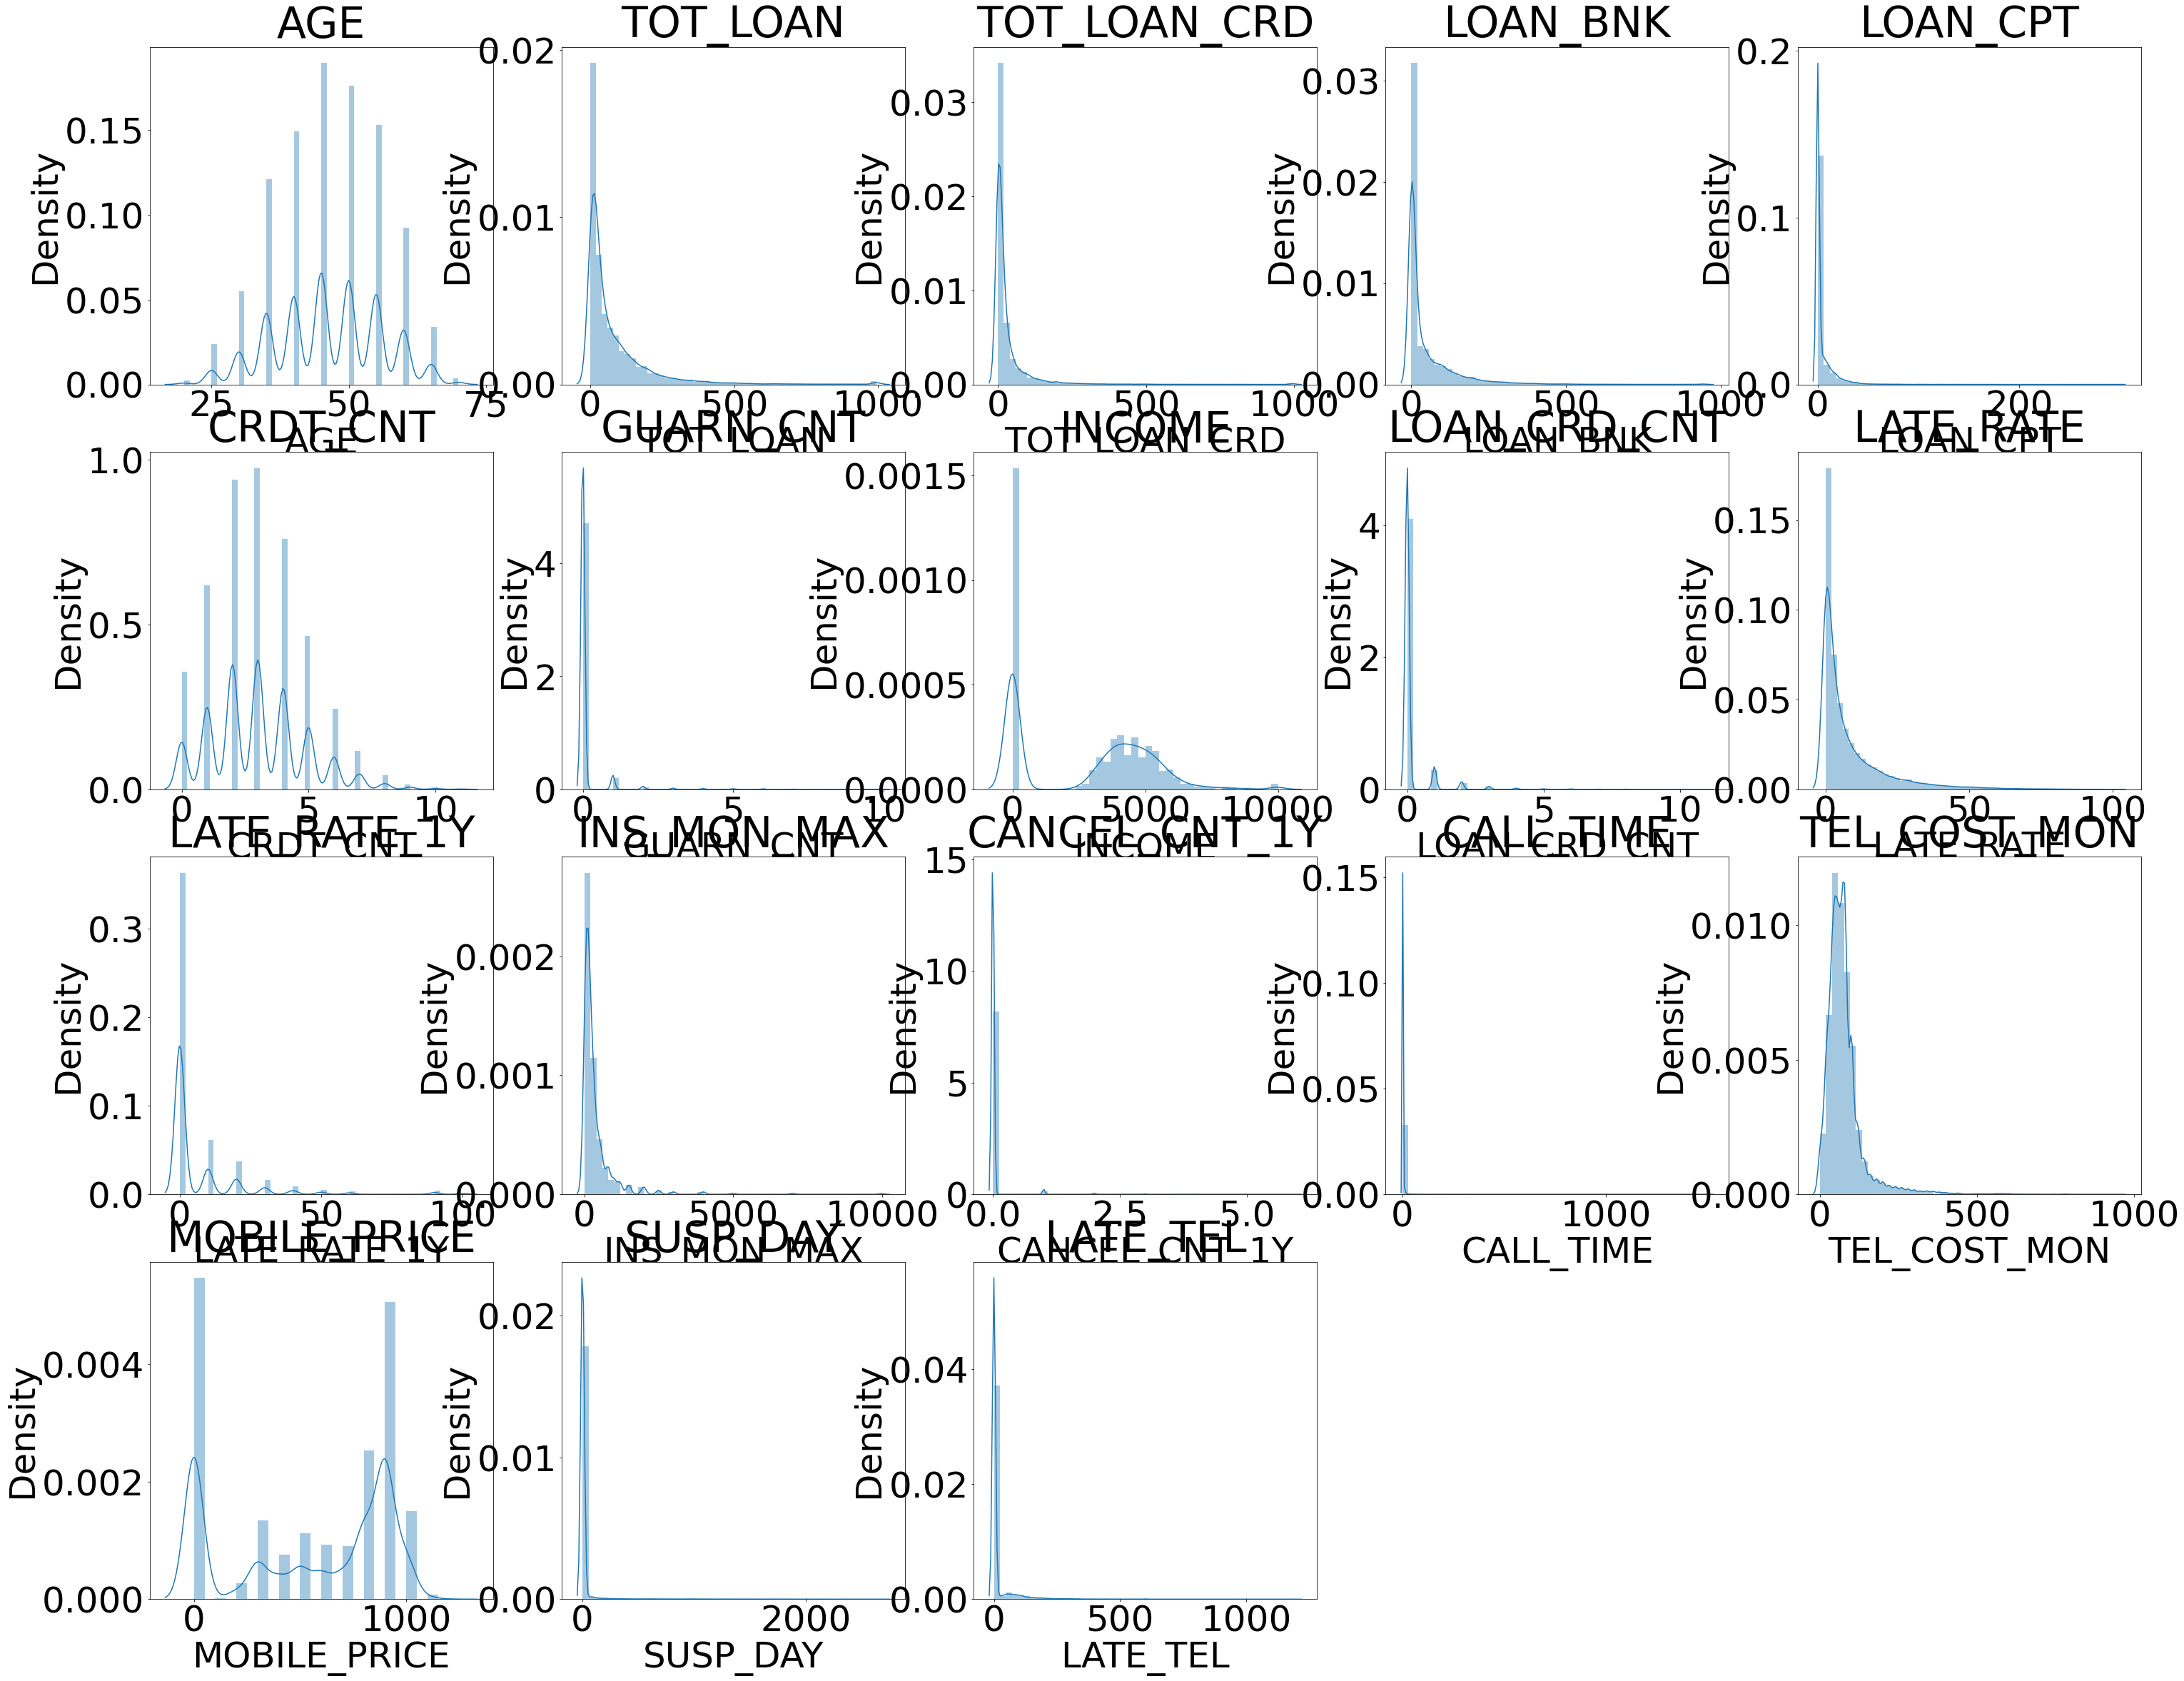

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore' )

fig = plt.figure(figsize=(50,40))
for i in range(len(num_cols)):
    ax = fig.add_subplot(4,5,i+1)
    ax = sns.distplot(data[num_cols[i]])
    plt.title(num_cols[i])

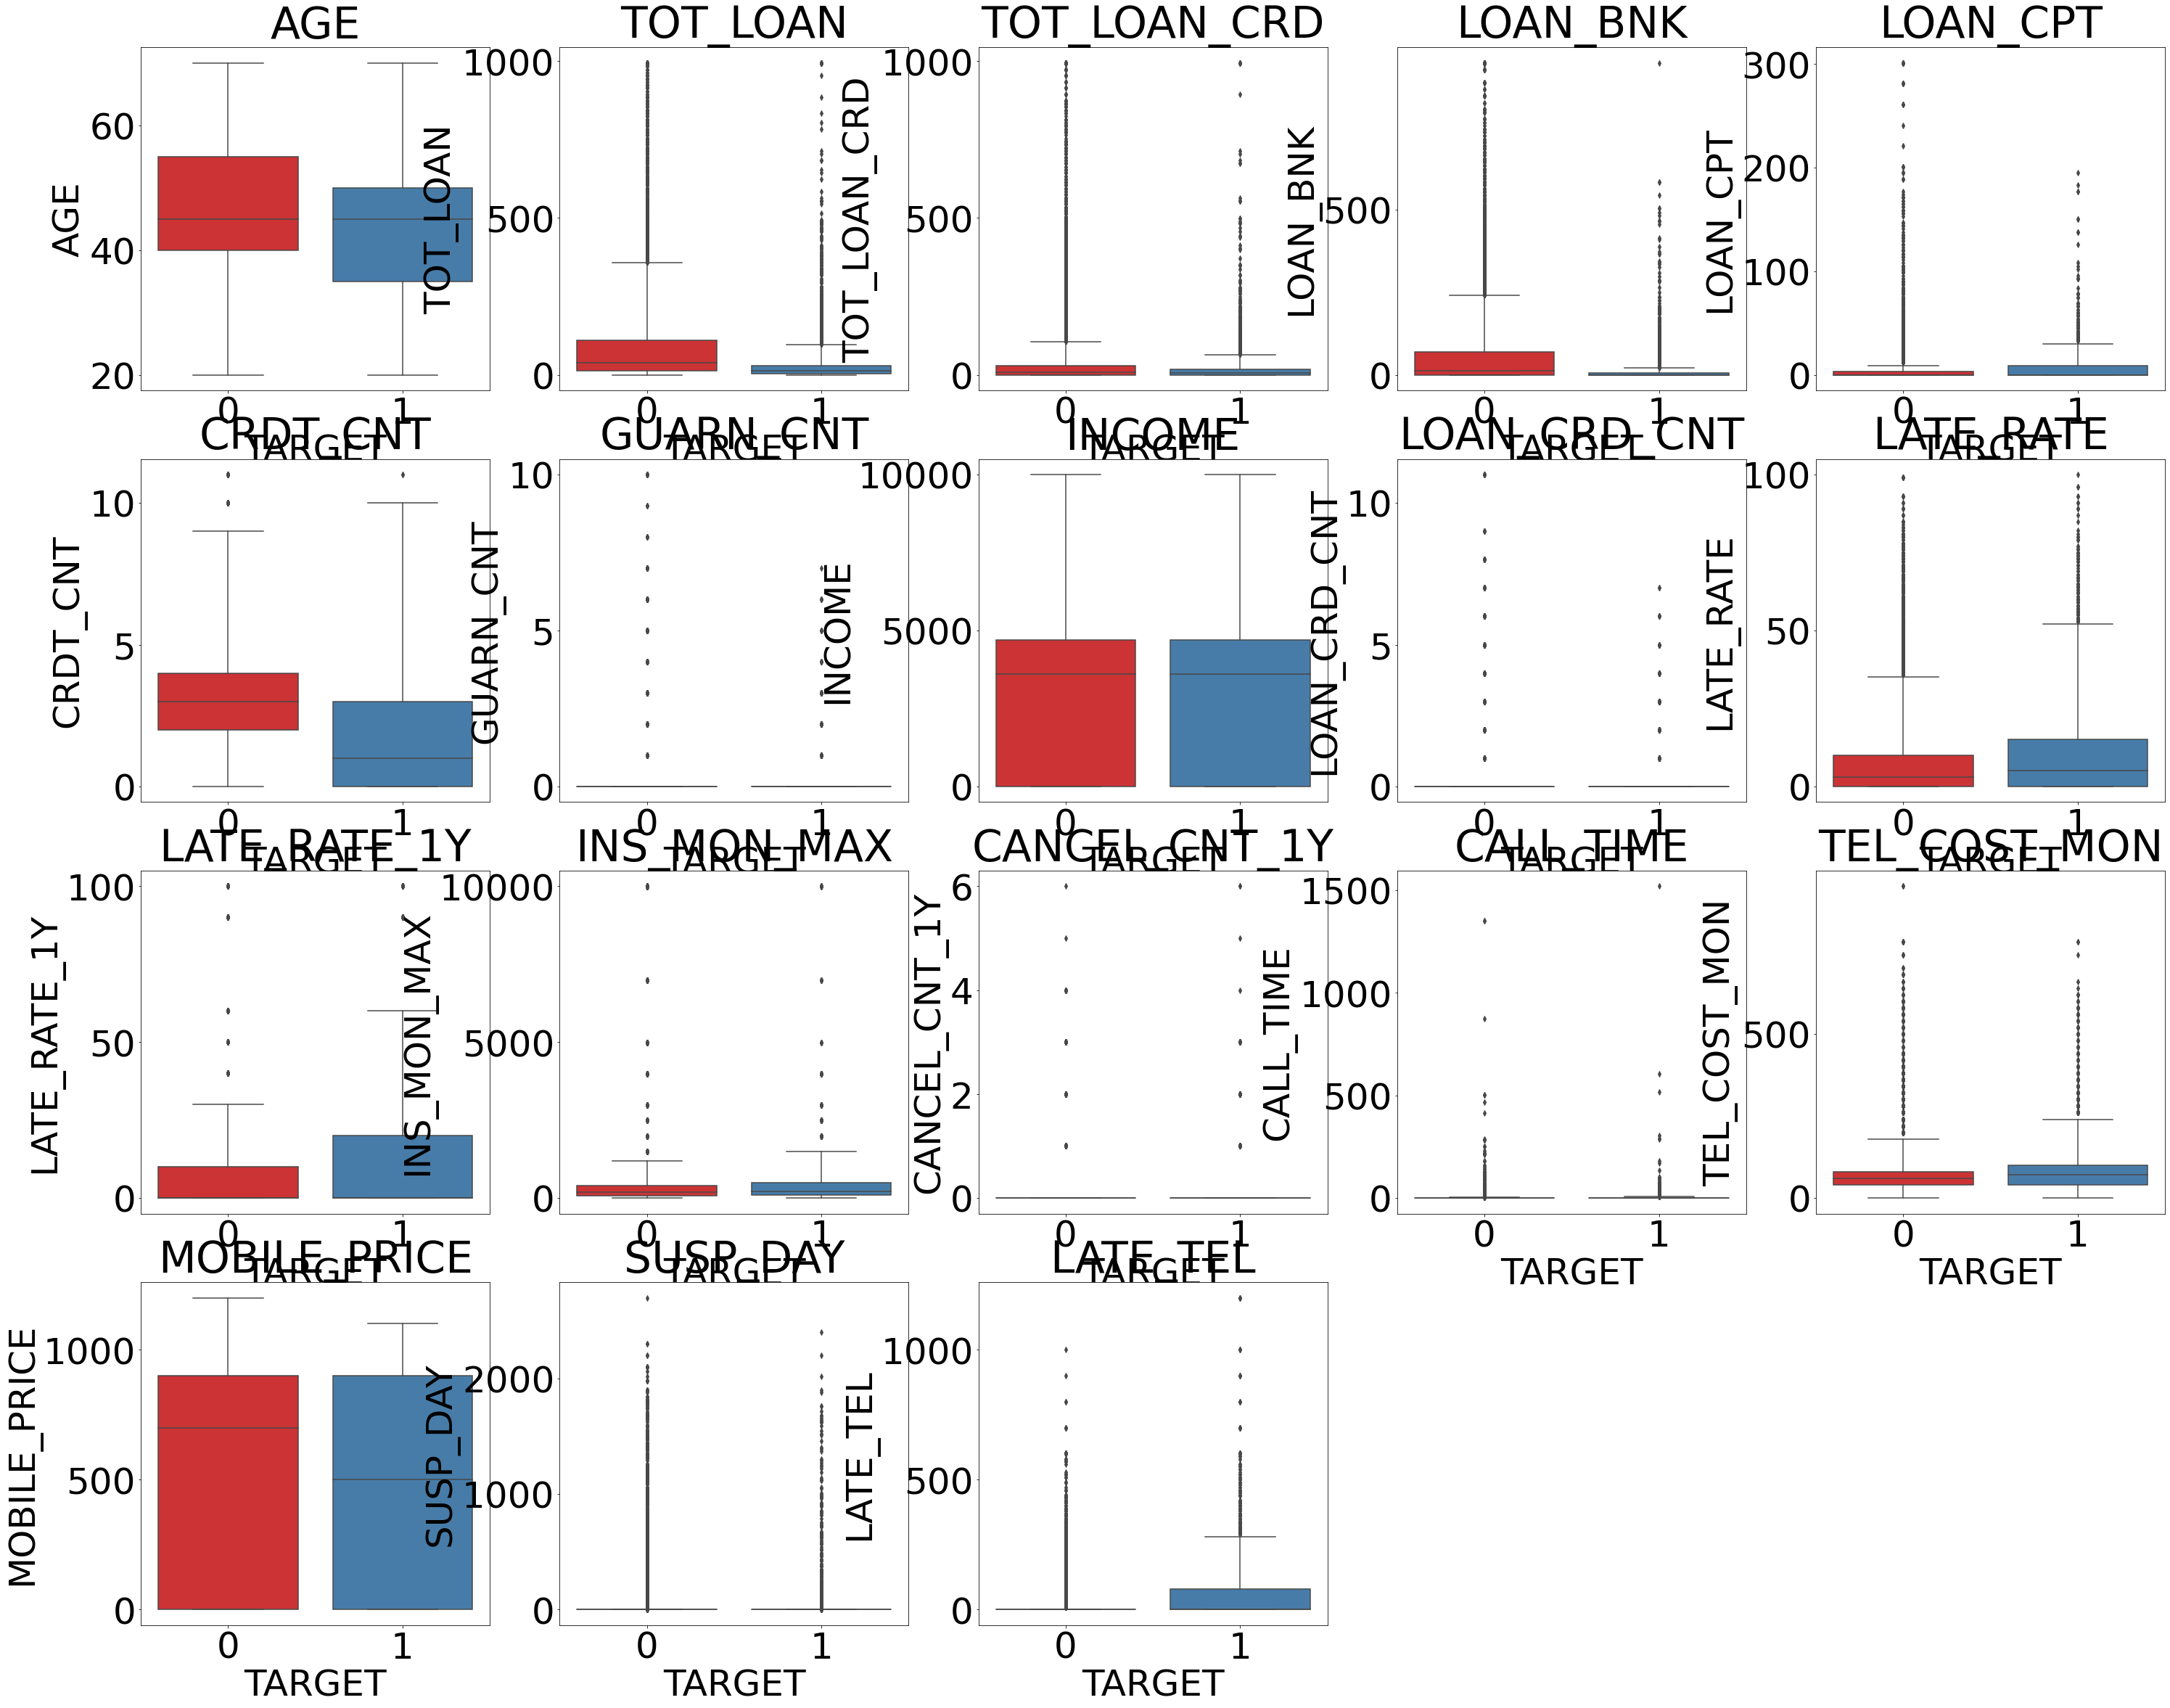

In [60]:
fig = plt.figure(figsize=(50,40))
for i in range(len(num_cols)):
    ax = fig.add_subplot(4,5,i+1)
    ax = sns.boxplot(data['TARGET'],data[num_cols[i]],whis=2.5,palette='Set1')
    plt.title(num_cols[i])

In [61]:
data = pd.get_dummies(data)
data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,...,1,0,0,0,0,1,0,0,0,1


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43386 entries, 0 to 43385
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            43386 non-null  int64  
 1   TOT_LOAN       43386 non-null  int64  
 2   TOT_LOAN_CRD   43386 non-null  int64  
 3   LOAN_BNK       43386 non-null  int64  
 4   LOAN_CPT       43386 non-null  int64  
 5   CRDT_CNT       43386 non-null  int64  
 6   GUARN_CNT      43386 non-null  int64  
 7   INCOME         43386 non-null  int64  
 8   LOAN_CRD_CNT   43386 non-null  int64  
 9   LATE_RATE      43386 non-null  int64  
 10  LATE_RATE_1Y   43386 non-null  int64  
 11  INS_MON_MAX    43386 non-null  float64
 12  CANCEL_CNT_1Y  43386 non-null  int64  
 13  CALL_TIME      43386 non-null  float64
 14  TEL_COST_MON   43386 non-null  int64  
 15  MOBILE_PRICE   43386 non-null  int64  
 16  SUSP_DAY       43386 non-null  int64  
 17  LATE_TEL       43386 non-null  int64  
 18  COMB_C

In [63]:
num_cols = ['TOT_LOAN','TOT_LOAN_CRD','LOAN_BNK','LOAN_CPT','GUARN_CNT','INCOME','LOAN_CRD_CNT','LATE_RATE','LATE_RATE_1Y',
           'INS_MON_MAX','CANCEL_CNT_1Y','CALL_TIME','TEL_COST_MON','MOBILE_PRICE','SUSP_DAY','LATE_TEL']

In [64]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [65]:
sc = StandardScaler()
data[['AGE','CRDT_CNT']] = sc.fit_transform(data[['AGE','CRDT_CNT']])
sc = RobustScaler()
data[num_cols] = sc.fit_transform(data[num_cols])

In [66]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [67]:
x_train, y_train = train.drop('TARGET',1), train['TARGET']
x_test, y_test = test.drop('TARGET',1), test['TARGET']

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [69]:
lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
loan_col=[]
for i in data.columns:
    loan_col.append(i)

loan_col.remove('TARGET')
loan_col

['AGE',
 'TOT_LOAN',
 'TOT_LOAN_CRD',
 'LOAN_BNK',
 'LOAN_CPT',
 'CRDT_CNT',
 'GUARN_CNT',
 'INCOME',
 'LOAN_CRD_CNT',
 'LATE_RATE',
 'LATE_RATE_1Y',
 'INS_MON_MAX',
 'CANCEL_CNT_1Y',
 'CALL_TIME',
 'TEL_COST_MON',
 'MOBILE_PRICE',
 'SUSP_DAY',
 'LATE_TEL',
 'COMB_COMM',
 'SEX_F',
 'SEX_M',
 'PAY_METHOD_A',
 'PAY_METHOD_B',
 'PAY_METHOD_C',
 'PAY_METHOD_D',
 'JOB_A',
 'JOB_B',
 'JOB_C',
 'JOB_D']

In [71]:
# 데이터 컬럼에 따른 beta, exp(beta) 체크
column_name = ["const"] + loan_col
beta = np.concatenate([lr.intercept_,lr.coef_.reshape(-1)]).round(2) # round(2) 소수점 둘째짜리까지 반올림
odds = np.exp(beta).round(2) # round(2) 소수점 둘째짜리까지 반올림
interpret = np.where(beta>0,'risky','protective') # np.where() 조건문 

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-1.15,0.32,protective
AGE,0.01,1.01,risky
TOT_LOAN,-0.27,0.76,protective
TOT_LOAN_CRD,0.05,1.05,risky
LOAN_BNK,-0.68,0.51,protective
LOAN_CPT,0.04,1.04,risky
CRDT_CNT,-0.86,0.42,protective
GUARN_CNT,0.06,1.06,risky
INCOME,0.15,1.16,risky
LOAN_CRD_CNT,-0.07,0.93,protective


In [76]:
beta_analysis.loc[beta_analysis.interpret=='protective'].index

Index(['const', 'TOT_LOAN', 'LOAN_BNK', 'CRDT_CNT', 'LOAN_CRD_CNT',
       'LATE_RATE', 'CALL_TIME', 'TEL_COST_MON', 'MOBILE_PRICE', 'SUSP_DAY',
       'COMB_COMM', 'SEX_F', 'SEX_M', 'PAY_METHOD_B', 'PAY_METHOD_C',
       'PAY_METHOD_D', 'JOB_A', 'JOB_B', 'JOB_C', 'JOB_D'],
      dtype='object')

In [77]:
beta_analysis.loc[beta_analysis.interpret!='protective'].index

Index(['AGE', 'TOT_LOAN_CRD', 'LOAN_CPT', 'GUARN_CNT', 'INCOME',
       'LATE_RATE_1Y', 'INS_MON_MAX', 'CANCEL_CNT_1Y', 'LATE_TEL',
       'PAY_METHOD_A'],
      dtype='object')

In [83]:
y_pred = lr.predict_proba(x_test)
predict_prob = pd.DataFrame(lr.predict_proba(x_test),columns=['P(Y=0)','P(Y=1)'])
P_1 = predict_prob['P(Y=1)']

In [87]:
#성능 평가하기
#Cut off 값을 변화하면서 Accuracy 성능 관찰
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score
Cut_off = np.linspace(0,1,11) ## cut off 값 여러개 만들어두기
for cutoff in Cut_off:
    y_pred = np.where(P_1>=cutoff,1,0) # 확률값이 cuf off보다 크면 1(대출연체), 아니면 0(연체x)
    acc = accuracy_score(y_true = y_test, y_pred =y_pred) ## 정확도
    recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
    precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도
    
#     print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
#     print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
#     print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))
#     print('Testing R2: {:.3f}'.format(r2_score(y_test, y_pred)))
    print(f"Accuracy:{acc:0.2f}",f"Recall:{recall:0.2f}",f"Precision:{precision:0.2f}", f"cut off:{cutoff:0.2f}",sep='  |  ')  


Accuracy:0.09  |  Recall:1.00  |  Precision:0.09  |  cut off:0.00
Accuracy:0.78  |  Recall:0.76  |  Precision:0.26  |  cut off:0.10
Accuracy:0.89  |  Recall:0.52  |  Precision:0.41  |  cut off:0.20
Accuracy:0.91  |  Recall:0.33  |  Precision:0.51  |  cut off:0.30
Accuracy:0.91  |  Recall:0.23  |  Precision:0.57  |  cut off:0.40
Accuracy:0.91  |  Recall:0.14  |  Precision:0.61  |  cut off:0.50
Accuracy:0.91  |  Recall:0.07  |  Precision:0.60  |  cut off:0.60
Accuracy:0.91  |  Recall:0.04  |  Precision:0.65  |  cut off:0.70
Accuracy:0.91  |  Recall:0.02  |  Precision:0.70  |  cut off:0.80
Accuracy:0.91  |  Recall:0.01  |  Precision:0.92  |  cut off:0.90
Accuracy:0.91  |  Recall:0.00  |  Precision:0.00  |  cut off:1.00


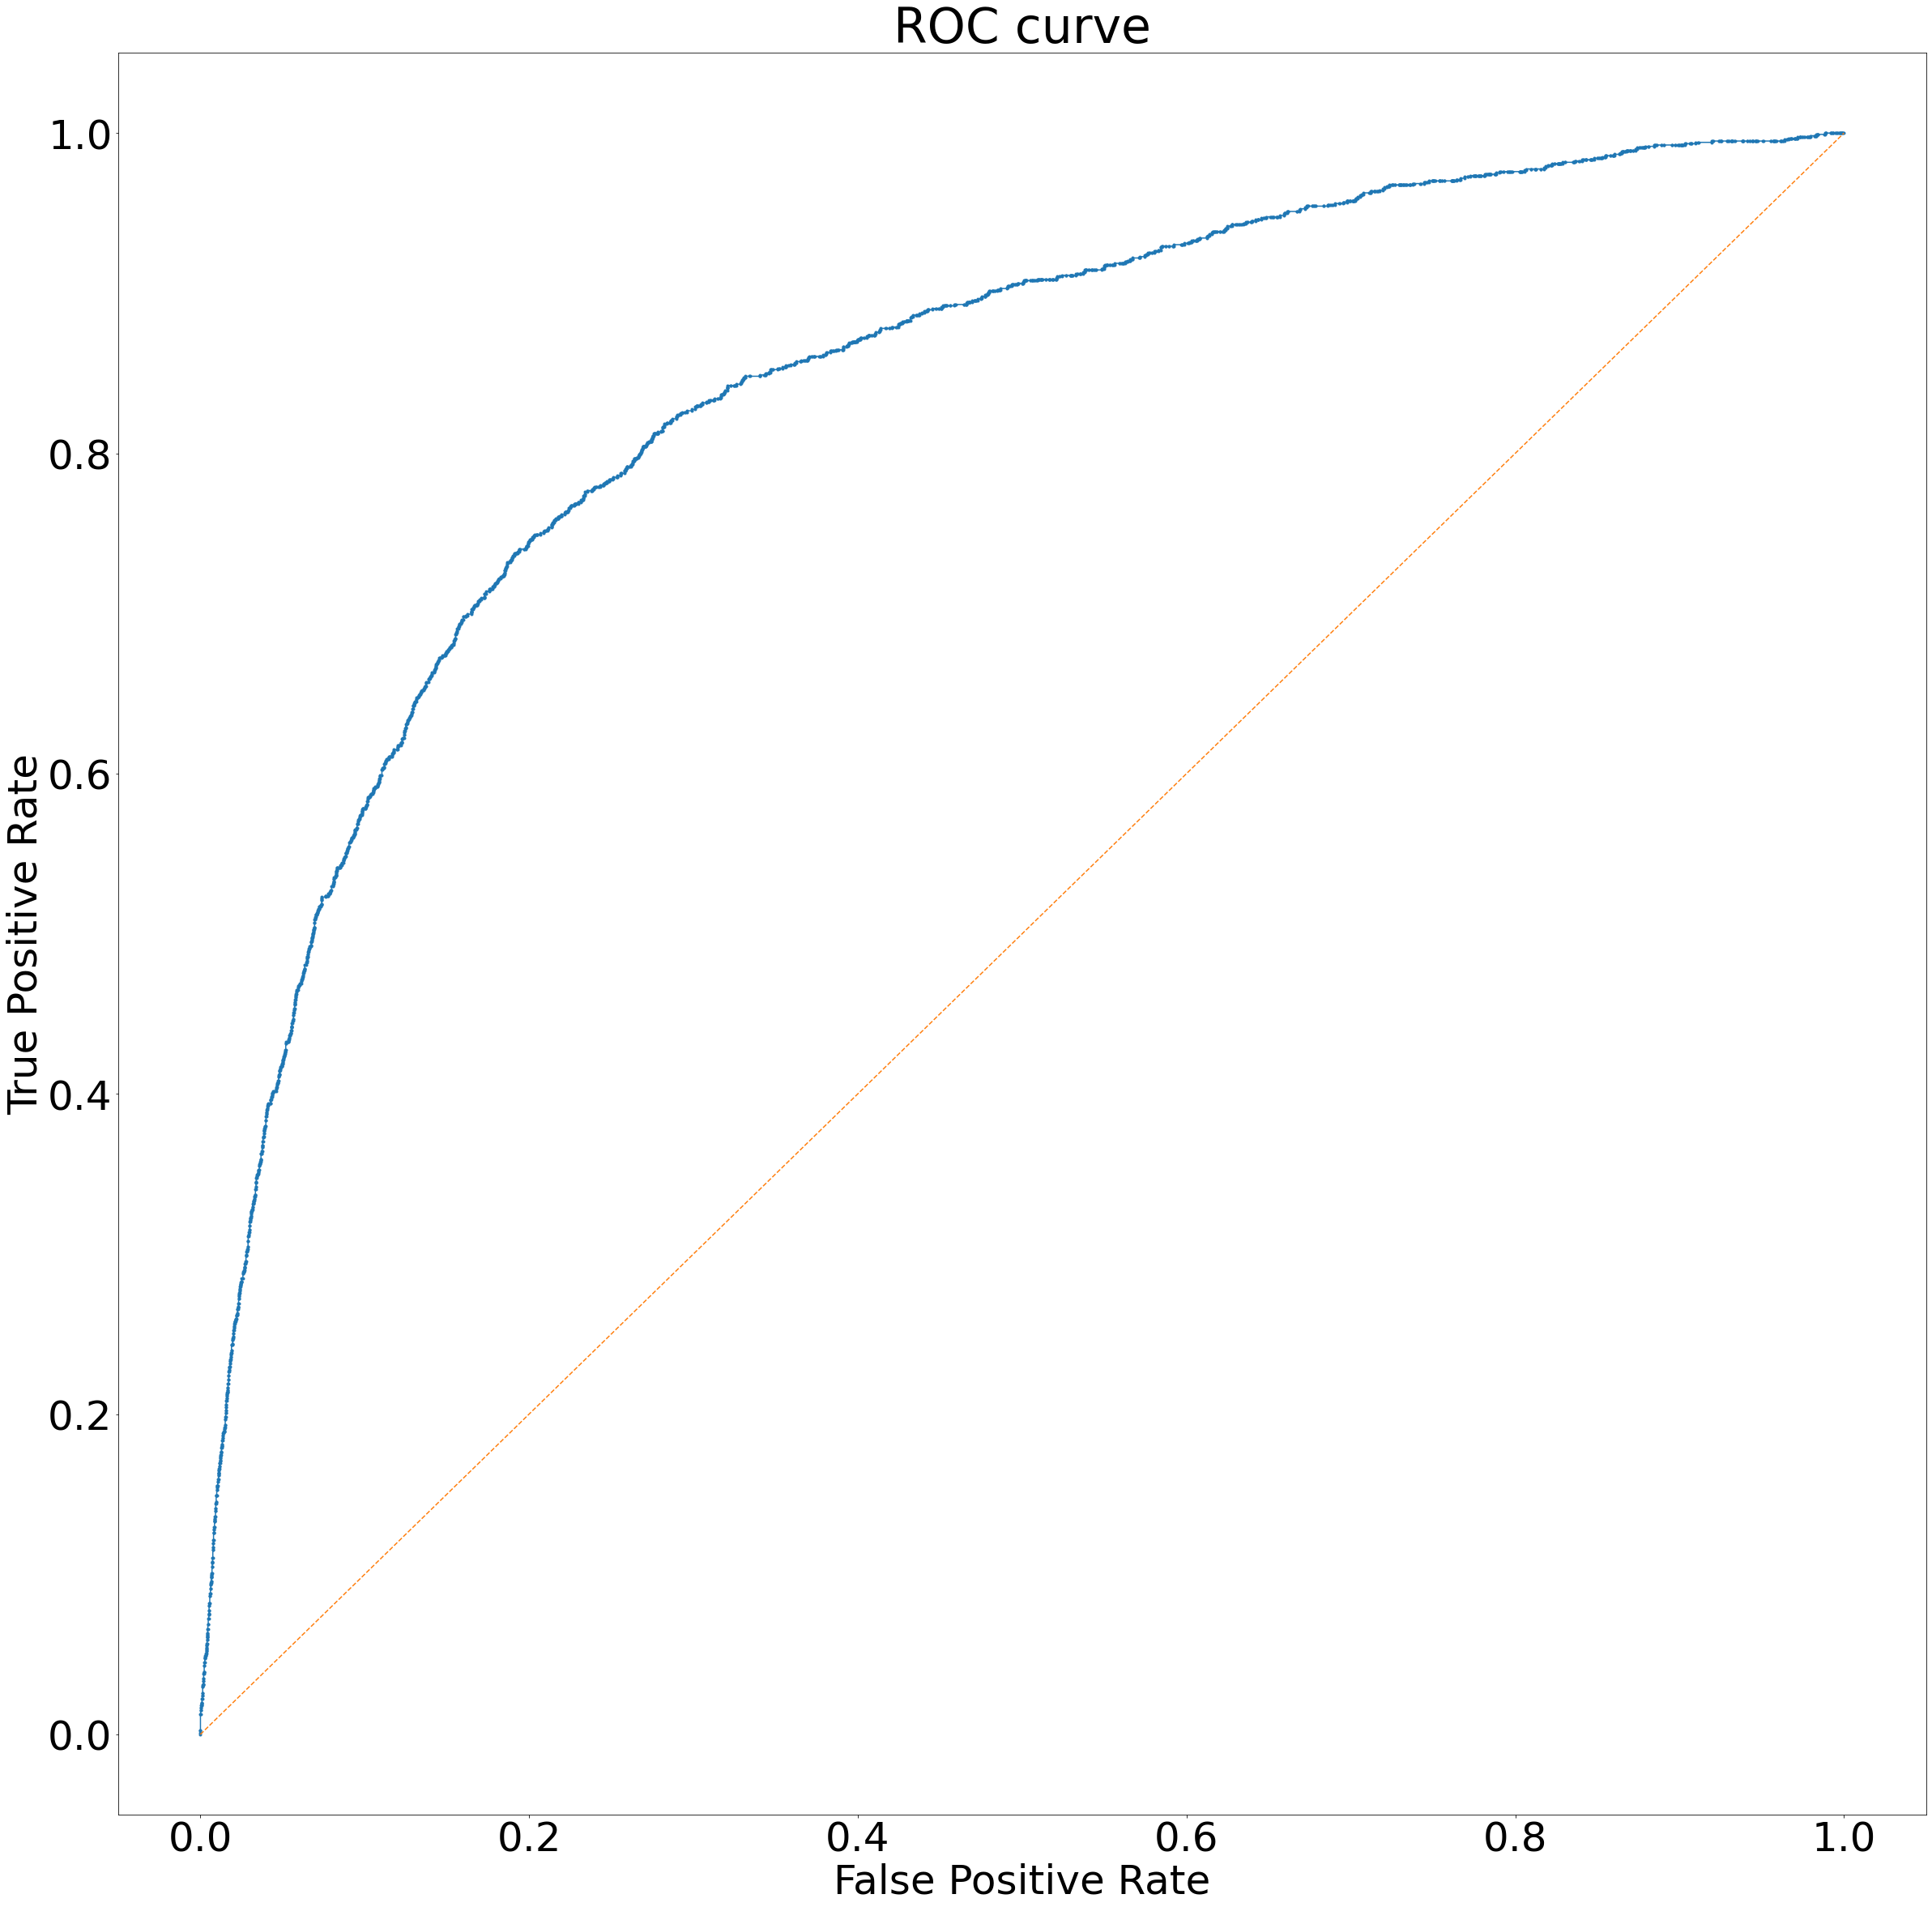

In [91]:
# X_test에 대한 P(Y=1) 예측 확률값 - 패키지 이용
probs = lr.predict_proba(x_test)[:, 1] ## [:,1]은 두번째 컬럼을 indexing 한다는 뜻
 
# Roc curve X 축, Y축 추출
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(x_test.__len__())])

# plot the roc curve for the model and random
plt.figure(figsize=(40,40))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# # show the legend
# plt.legend(fontsize=20)
 
# show the plot
plt.title("ROC curve")
plt.show()